# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [1]:
import pandas as pd

In [2]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"column 1": [20,50,15,50,65,50,10], "column 2": [0,1,1,1,0,0,1]})
sample_df

,column 1,column 2
0,20,0
1,50,1
2,15,1
3,50,1
4,65,0
5,50,0
6,10,1


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from column 1 that have a value of 0 in column 2.

Run the code below to see how this works.

In [12]:
# This code selects all values from column 1 where the value on that same row in column 2 is equal to 0
sample_df["column 1"].loc[sample_df["column 2"] == 0]

0    20
4    65
5    70
Name: column 1, dtype: int64

Now you try! Select all the values from column 1 where the value on that same row in column 2 is equal to 1.

In [3]:
sample_df["column 1"].loc[sample_df["column 2"] == 1]

1    50
2    15
3    50
6    10
Name: column 1, dtype: int64

Now select all the values from column 2 where the value on that same row in column 1 is equal to 50.

In [4]:
sample_df["column 2"].loc[sample_df["column 1"] == 50]

1    1
3    1
5    0
Name: column 2, dtype: int64

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [19]:
import numpy as np # You will need to import numpy

In [21]:
# You can use this function in your code to find the log of distance:

# np.log10()

#### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [8]:
# opening data
starclusters = pd.read_csv("oh_table.csv")

In [11]:
# isolating data
distance = starclusters["distance"].loc[starclusters["group_id"] == 1]
G = starclusters["G"].loc[starclusters["group_id"] == 1]
J = starclusters["J"].loc[starclusters["group_id"] == 1]

In [23]:
# x axis data
color = G-J

# y axis data
import numpy as np
absG = G - 5 * np.log10(distance) + 5

# sun data
SunJ = 3.64
SunG = 5.12

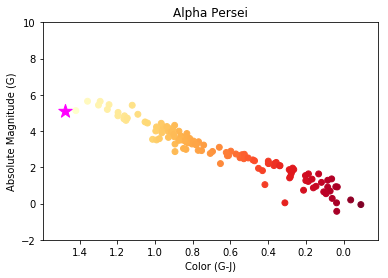

In [30]:
# making HR diagram
import matplotlib.pyplot as plt
cm = plt.cm.get_cmap("YlOrRd_r")# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(color, absG, c=color, s=35, cmap=cm) # This plots all our points as a scatterplot
plt.scatter(SunG-SunJ, SunG, marker='*', c = 'magenta', s=200, cmap=cm)
plt.ylim([-2,10])
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('Alpha Persei')
plt.gca().invert_xaxis() # This inverts the x axis so that the hottest stars are on the left.
plt.show()